In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import statistics
from scipy.stats import iqr


In [2]:
df = pd.read_csv('H:/J - Applied Statistics/Assignments/1/sscsample.csv')

In [3]:
df.describe()

,Unnamed: 0,income,ethnicity,neighborhood
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,8.994273,1.800000,10.490000
std,29.011492,2.294169,0.752101,5.779614
min,1.000000,4.069000,1.000000,1.000000
25%,25.750000,7.399825,1.000000,5.750000
50%,50.500000,8.815750,2.000000,10.500000
75%,75.250000,10.263575,2.000000,15.250000
max,100.000000,14.441400,3.000000,20.000000


Text(0.5, 1.0, 'Boxplot - Income for the three ethnic groups')

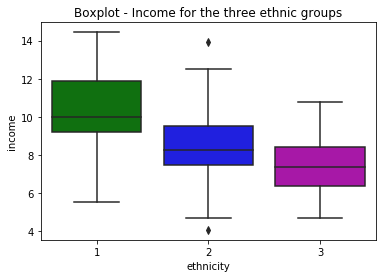

In [10]:
my_pal = {1: "g", 2: "b", 3:"m"}
sns.boxplot( x=df["ethnicity"], y=df["income"], palette=my_pal).set_title('Boxplot - Incomes for the three ethnic groups')

In [14]:
for i in range(1,4):
    print('Mean income for ethnicity', i, 'is', df[df['ethnicity']==i]['income'].mean())

Mean income for ethnicity 1 is 10.3104375
Mean income for ethnicity 2 is 8.410405
Mean income for ethnicity 3 is 7.529680000000002


In [4]:
mean_income_dict = {}

In [5]:
# Simple Random Sampling
np.random.seed(0)
mean_income_RandomSampling = []
for i in range(200):
    index = np.random.randint(low=1, high=101, size=20)
    df_temp = df.loc[index]
    mean_income_RandomSampling.append(df_temp['income'].mean())

print("Mean of the sampling distribution of the sample mean for simple random sampling:"
      , sum(mean_income_RandomSampling)/len(mean_income_RandomSampling))

mean_income_dict['Simple Random Sampling'] = mean_income_RandomSampling

Mean of the sampling distribution of the sample mean for simple random sampling: 8.994810428242173


c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [6]:
# Stratified Random Sampling
np.random.seed(0)
mean_income_StratifiedRandomSampling = []
index_dict = [{'low':1,'high':41}, 
              {'low':41,'high':81}, 
              {'low':81,'high':101}
             ]
index_prop = [40*20/100, 40*20/100, 20*20/100]
for i in range(200):
    index = []
    for j in range(3):
        for x in list(np.random.randint(low=index_dict[j]['low'], high=index_dict[j]['high'], size=int(index_prop[j]))):
            index.append(x)        
    df_temp = df.loc[index]
    mean_income_StratifiedRandomSampling.append(df_temp['income'].mean())

print("Mean of the sampling distribution of the sample mean for Stratified random sampling:"
      , sum(mean_income_StratifiedRandomSampling)/len(mean_income_StratifiedRandomSampling))

mean_income_dict['Stratified Random Sampling'] = mean_income_StratifiedRandomSampling

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


Mean of the sampling distribution of the sample mean for Stratified random sampling: 8.975331453947366


In [7]:
# Cluster Random Sampling
np.random.seed(0)
mean_income_ClusterRandomSampling = []

for i in range(200):
    incomes = []
    for j in np.random.randint(low=1, high=21, size=6):
        for income in df[df['neighborhood']==j]['income'].values:
            incomes.append(income)
    mean_income_ClusterRandomSampling.append(sum(incomes[:20])/20)

print("Mean of the sampling distribution of the sample mean for Cluster random sampling:"
      , sum(mean_income_ClusterRandomSampling)/len(mean_income_ClusterRandomSampling))

mean_income_dict['Cluster Random Sampling'] = mean_income_ClusterRandomSampling

Mean of the sampling distribution of the sample mean for Cluster random sampling: 9.025136124999996


In [10]:
df_incomes = pd.DataFrame.from_dict(mean_income_dict)
df_incomes.to_csv('H:/J - Applied Statistics/Assignments/1/mean_incomes.csv')

,Simple Random Sampling,Stratified Random Sampling,Cluster Random Sampling
0,8.538630,9.165955,8.540580
1,9.505711,9.301945,9.375785
2,8.885975,8.933860,9.493645
3,8.523584,8.910520,10.129800
4,9.444437,8.644330,7.368555
5,9.014690,8.294670,10.517280
6,8.483500,8.744675,9.401480
7,8.537015,8.502875,8.755685
8,8.521220,9.426390,9.470575
9,9.895630,8.860884,10.267010


In [84]:
statistics.stdev(mean_income_ClusterRandomSampling)

0.7694465714668365

In [94]:
# Spreads of  the  sampling distributions
mean_incomes = {'ClusterRandomSampling':mean_income_ClusterRandomSampling,
               'StratifiedRandomSampling':mean_income_StratifiedRandomSampling,
               'RandomSampling':mean_income_RandomSampling}
for method in mean_incomes:
    print(method,':')
    print('Standard Deviation =',statistics.stdev(mean_incomes[method]))
    print('Inter Quartile Range =',iqr(mean_incomes[method]))

ClusterRandomSampling :
Standard Deviation = 0.7694465714668365
Inter Quartile Range = 1.0226875
StratifiedRandomSampling :
Standard Deviation = 0.46517088794762035
Inter Quartile Range = 0.628253749999999
RandomSampling :
Standard Deviation = 0.5082238642647554
Inter Quartile Range = 0.73581875


In [89]:
mean_income_ClusterRandomSampling

[8.54058,
 9.375785,
 9.493645,
 10.1298,
 7.368555000000001,
 10.51728,
 9.40148,
 8.755685,
 9.470575,
 10.26701,
 10.284005,
 9.246895,
 9.02345,
 9.008700000000001,
 8.44491,
 8.276215,
 8.668490000000002,
 8.729885000000001,
 8.690320000000002,
 8.92601,
 9.40674,
 9.13097,
 10.059019999999999,
 9.275595,
 10.008939999999999,
 8.581445,
 9.193964999999999,
 10.133734999999998,
 8.296945,
 9.005505,
 8.89333,
 10.017880000000002,
 9.47235,
 9.94866,
 9.432440000000001,
 9.518230000000003,
 8.325425,
 8.962315,
 8.243229999999999,
 8.938880000000001,
 8.6705,
 7.572805000000001,
 6.952750000000002,
 9.4488,
 9.565535,
 9.31854,
 9.940355,
 9.4404,
 8.87868,
 9.19125,
 8.269755,
 8.18336,
 10.120940000000001,
 9.693440000000002,
 8.525065000000001,
 10.403964999999998,
 7.6975549999999995,
 8.507185,
 8.110205,
 10.007054999999998,
 9.45522,
 9.548685000000003,
 7.999744999999999,
 9.866810000000001,
 8.773865,
 9.197064999999998,
 8.16843,
 9.625755000000002,
 9.675185000000003,
 9.

In [90]:
mean_income_StratifiedRandomSampling

[8.54058,
 9.375785,
 9.493645,
 10.1298,
 7.368555000000001,
 10.51728,
 9.40148,
 8.755685,
 9.470575,
 10.26701,
 10.284005,
 9.246895,
 9.02345,
 9.008700000000001,
 8.44491,
 8.276215,
 8.668490000000002,
 8.729885000000001,
 8.690320000000002,
 8.92601,
 9.40674,
 9.13097,
 10.059019999999999,
 9.275595,
 10.008939999999999,
 8.581445,
 9.193964999999999,
 10.133734999999998,
 8.296945,
 9.005505,
 8.89333,
 10.017880000000002,
 9.47235,
 9.94866,
 9.432440000000001,
 9.518230000000003,
 8.325425,
 8.962315,
 8.243229999999999,
 8.938880000000001,
 8.6705,
 7.572805000000001,
 6.952750000000002,
 9.4488,
 9.565535,
 9.31854,
 9.940355,
 9.4404,
 8.87868,
 9.19125,
 8.269755,
 8.18336,
 10.120940000000001,
 9.693440000000002,
 8.525065000000001,
 10.403964999999998,
 7.6975549999999995,
 8.507185,
 8.110205,
 10.007054999999998,
 9.45522,
 9.548685000000003,
 7.999744999999999,
 9.866810000000001,
 8.773865,
 9.197064999999998,
 8.16843,
 9.625755000000002,
 9.675185000000003,
 9.